In [1]:
# Se va a trabajar con un archivo te texto separada por tabulaciones
#Los datos están organizados en un "data frame" y provienene de una imagen satelital del sensor MODIS
# En la imagen se seleccionaron puntos geográficos al azar, para obtener productos de color del mar (clorofila-a, reflectancias en 
#diferentes bandas ópticas, Kd, línea de fluorescencia, etc)
#las localizaciones se situan en los golfos norpatagónicos de Argentina: Los golfos  San Matías, San José y Nuevo.

#Primero instalamos el paquete pandas para poder leer el archivo txt.

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Leer archivo con separador de tabulaciones
df = pd.read_csv('20032521855-ptosnorpat-oc.txt', sep='\t')  # Cambia sep='\t' según el separador real

# Mostrar los primeros datos
print(df.head())

    Name   Latitude  Longitude  PixelX  PixelY  aot_869  angstrom   Rrs_412  \
0  pin_1 -42.907681 -64.323219   151.5   207.5   0.0138    1.5321  0.001346   
1  pin_2 -42.837578 -64.422752   153.5   220.5   0.0145    1.2214  0.000762   
2  pin_3 -42.718426 -64.621536   158.5   235.5   0.0159    0.8187  0.000616   
3  pin_4 -42.598263 -64.684631   158.5   251.5   0.0174    0.7741 -0.000578   
4  pin_5 -42.671650 -64.415894   150.5   235.5   0.0161    0.7013  0.000640   

    Rrs_443   Rrs_469  ...  Kd_490       pic         poc      ipar      nflh  \
0  0.002716  0.004154  ...  0.1206  0.001456  329.999908  0.001006  0.172515   
1  0.001786  0.002858  ...  0.1300  0.000588  357.999908  0.001012  0.065245   
2  0.001202  0.001974  ...  0.1674  0.000066  405.599915  0.001020  0.188835   
3  0.000528  0.001448  ...  0.1558       NaN  773.199890  0.001024  0.138600   
4  0.001246  0.001978  ...  0.1558  0.000084  395.999908  0.001018  0.180250   

         par    l2_flags  longitude   latitu

In [3]:
# Mostrar las columnas disponibles
print("Columnas disponibles:", df.columns)

Columnas disponibles: Index(['Name', 'Latitude', 'Longitude', 'PixelX', 'PixelY', 'aot_869',
       'angstrom', 'Rrs_412', 'Rrs_443', 'Rrs_469', 'Rrs_488', 'Rrs_531',
       'Rrs_547', 'Rrs_555', 'Rrs_645', 'Rrs_667', 'Rrs_678', 'chlor_a',
       'chl_ocx', 'Kd_490', 'pic', 'poc', 'ipar', 'nflh', 'par', 'l2_flags',
       'longitude', 'latitude', 'pins'],
      dtype='object')


In [4]:
#Crear un grafico que muestre la relación clorofila-a y altura de la línea de fluorescencia (nflh). Ambos productos obtenidos
#del sensor MODIS
#Seleccionar las columnas para el grafico
x = df['chlor_a']
y = df['nflh']

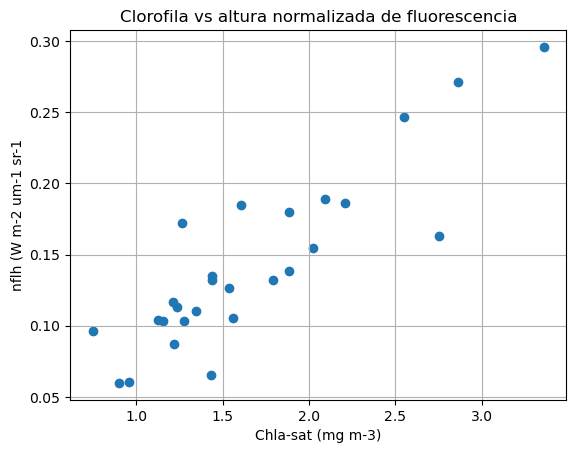

In [6]:
#crear el scatter plott

plt.scatter(x, y)
plt.xlabel('Chla-sat (mg m-3)')
plt.ylabel('nflh (W m-2 um-1 sr-1)')
plt.title('Clorofila-a vs altura normalizada de fluorescencia')
plt.grid(True)
plt.show()

In [9]:
#ajustar una recta Standar Major Axis a cada par de datos
#El método Standard Major Axis (SMA), también conocido como regresión de eje mayor (Major Axis Regression),
#es una técnica de regresión usada para analizar la relación entre dos variables cuando ambas tienen errores de medición y
#no hay una clara distinción entre variable independiente y dependiente.

import numpy as np

In [10]:
def sma_fit(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    sx = np.std(x, ddof=1)
    sy = np.std(y, ddof=1)
    r = np.corrcoef(x, y)[0, 1]
    
    slope = sy / sx if r >= 0 else -sy / sx
    intercept = y_mean - slope * x_mean
    return slope, intercept

Recta SMA: y = 0.0936x + -0.0136


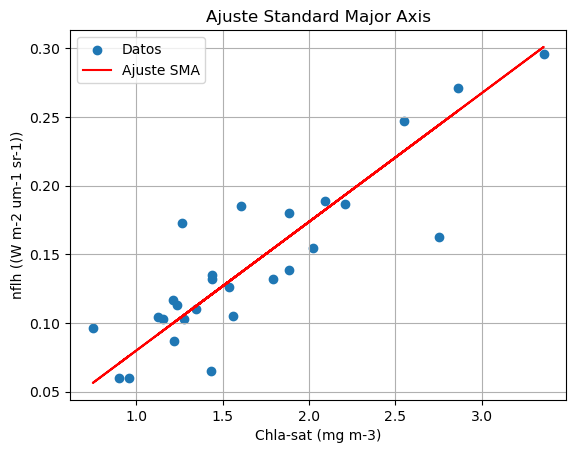

In [15]:
# Realizar una ajuste a SMA Chla-sat y nflh
df = pd.read_csv('20032521855-ptosnorpat-oc.txt', sep='\t')  # Ajusta el separador si es coma

x = df['chlor_a']
y = df['nflh']

# Ajuste SMA
slope, intercept = sma_fit(x, y)

# Mostrar ecuación
print(f"Recta SMA: y = {slope:.4f}x + {intercept:.4f}")

# Graficar
plt.scatter(x, y, label='Datos')
plt.plot(x, slope * x + intercept, color='red', label='Ajuste SMA')
plt.xlabel('Chla-sat (mg m-3)')
plt.ylabel('nflh ((W m-2 um-1 sr-1))')
plt.title('Ajuste Standard Major Axis')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
#Seleccionar las columnas que  para el scatter plot
x = df['chlor_a']
y = df['Kd_490']

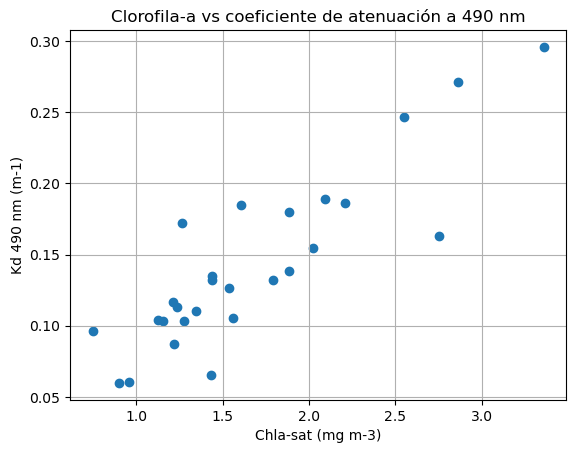

In [14]:
#crear el scatter plott

plt.scatter(x, y)
plt.xlabel('Chla-sat (mg m-3)')
plt.ylabel('Kd 490 nm (m-1)')
plt.title('Clorofila-a vs coeficiente de atenuación a 490 nm')
plt.grid(True)
plt.show()

Recta SMA: y = 0.0570x + 0.0481


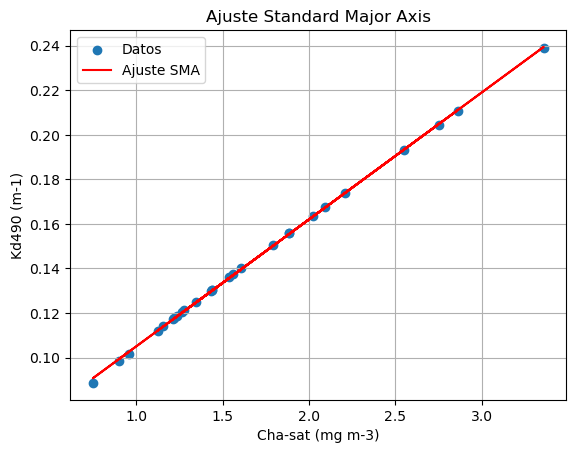

In [12]:
# Realizar una ajuste a SMA Chla-sat y Kd

x = df['chlor_a']
y = df['Kd_490']

# Ajuste SMA
slope, intercept = sma_fit(x, y)

# Mostrar ecuación
print(f"Recta SMA: y = {slope:.4f}x + {intercept:.4f}")

# Graficar
plt.scatter(x, y, label='Datos')
plt.plot(x, slope * x + intercept, color='red', label='Ajuste SMA')
plt.xlabel('Cha-sat (mg m-3)')
plt.ylabel('Kd490 (m-1)')
plt.title('Ajuste Standard Major Axis')
plt.legend()
plt.grid(True)
plt.show()